In [1]:
import pandas as pd 
import numpy as np
heart_rate = pd.read_csv('./HUAMI_EXTENDED_ACTIVITY_SAMPLE_202510311056.csv')
spo2 = pd.read_csv('./HUAMI_SPO2_SAMPLE_202510311139.csv')
stress = pd.read_csv('./HUAMI_STRESS_SAMPLE_202510311139.csv')

In [2]:
import pandas as pd
import numpy as np

def normalize_timestamp(ts: pd.Series) -> pd.Series:
    """
    Convert Unix timestamps to seconds.
    Handles both seconds and milliseconds automatically.
    """
    ts = ts.astype("int64")

    # If numbers are too big, they are milliseconds → convert
    if ts.median() > 10**11:
        ts = ts // 1000

    return ts


In [3]:
for df in (heart_rate,spo2,stress):
    df["ts_sec"] = normalize_timestamp(df["TIMESTAMP"])

    # Convert to real datetime (UTC → local timezone)
    df["datetime"] = pd.to_datetime(df["ts_sec"], unit="s", utc=True)\
                        .dt.tz_convert("Europe/Berlin")

    # Now split into parts for aggregation
    df["datetime"] = df["datetime"].dt.tz_localize(None)
    df["date"]   = df["datetime"].dt.date
    df["hour"]   = df["datetime"].dt.hour
    df["minute"] = df["datetime"].dt.minute
    df["second"] = df["datetime"].dt.second


In [4]:
# stress.to_excel('./stress.xlsx')

In [5]:
heart_rate

,TIMESTAMP,DEVICE_ID,USER_ID,RAW_INTENSITY,STEPS,RAW_KIND,HEART_RATE,UNKNOWN1,SLEEP,DEEP_SLEEP,REM_SLEEP,ts_sec,datetime,date,hour,minute,second
0,1750058520,1,1.0,44,21,80,255,13,1,0,0,1750058520,2025-06-16 09:22:00,2025-06-16,9,22,0
1,1750060620,1,1.0,63,48,115,255,5,30,0,0,1750060620,2025-06-16 09:57:00,2025-06-16,9,57,0
2,1750063320,1,1.0,110,116,112,255,5,2,0,0,1750063320,2025-06-16 10:42:00,2025-06-16,10,42,0
3,1750063380,1,1.0,96,76,112,81,29,2,0,0,1750063380,2025-06-16 10:43:00,2025-06-16,10,43,0
4,1750063440,1,1.0,114,97,64,83,21,1,0,0,1750063440,2025-06-16 10:44:00,2025-06-16,10,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215432,1761197760,21,5.1,0,0,115,255,5,60,0,0,1761197760,2025-10-23 07:36:00,2025-10-23,7,36,0
215433,1761197760,22,18.0,0,0,115,255,5,60,0,0,1761197760,2025-10-23 07:36:00,2025-10-23,7,36,0
215434,1761197760,23,19.0,0,0,118,255,5,40,0,0,1761197760,2025-10-23 07:36:00,2025-10-23,7,36,0
215435,1761197760,24,9.1,0,0,115,255,5,60,0,0,1761197760,2025-10-23 07:36:00,2025-10-23,7,36,0


In [6]:
heart_rate

,TIMESTAMP,DEVICE_ID,USER_ID,RAW_INTENSITY,STEPS,RAW_KIND,HEART_RATE,UNKNOWN1,SLEEP,DEEP_SLEEP,REM_SLEEP,ts_sec,datetime,date,hour,minute,second
0,1750058520,1,1.0,44,21,80,255,13,1,0,0,1750058520,2025-06-16 09:22:00,2025-06-16,9,22,0
1,1750060620,1,1.0,63,48,115,255,5,30,0,0,1750060620,2025-06-16 09:57:00,2025-06-16,9,57,0
2,1750063320,1,1.0,110,116,112,255,5,2,0,0,1750063320,2025-06-16 10:42:00,2025-06-16,10,42,0
3,1750063380,1,1.0,96,76,112,81,29,2,0,0,1750063380,2025-06-16 10:43:00,2025-06-16,10,43,0
4,1750063440,1,1.0,114,97,64,83,21,1,0,0,1750063440,2025-06-16 10:44:00,2025-06-16,10,44,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215432,1761197760,21,5.1,0,0,115,255,5,60,0,0,1761197760,2025-10-23 07:36:00,2025-10-23,7,36,0
215433,1761197760,22,18.0,0,0,115,255,5,60,0,0,1761197760,2025-10-23 07:36:00,2025-10-23,7,36,0
215434,1761197760,23,19.0,0,0,118,255,5,40,0,0,1761197760,2025-10-23 07:36:00,2025-10-23,7,36,0
215435,1761197760,24,9.1,0,0,115,255,5,60,0,0,1761197760,2025-10-23 07:36:00,2025-10-23,7,36,0


In [7]:
heart_rate["USER"] = (
    pd.to_numeric(heart_rate["USER_ID"], errors="coerce")   # converts bad values to NaN
      .floordiv(1)                                          # drop decimal part (1.0->1, 1.1->1)
      .astype("Int64")                                      # nullable integer type
)


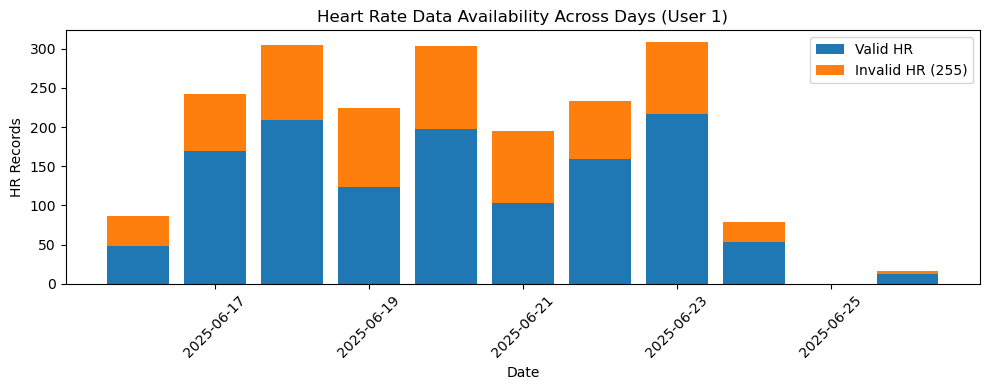

In [8]:
import matplotlib.pyplot as plt

# Filter for USER = 1
hr_u1 = heart_rate[heart_rate["USER_ID"] == 1]

# Total HR records per day
daily_total = (
    hr_u1
    .groupby("date")
    .size()
    .reset_index(name="total_hr_count")
)

# Invalid HR (=255) per day
daily_invalid = (
    hr_u1[hr_u1["HEART_RATE"] == 255]
    .groupby("date")
    .size()
    .reset_index(name="invalid_hr_count")
)

# Merge counts
daily_hr = daily_total.merge(daily_invalid, on="date", how="left")
daily_hr["invalid_hr_count"] = daily_hr["invalid_hr_count"].fillna(0)

# Valid HR count
daily_hr["valid_hr_count"] = (
    daily_hr["total_hr_count"] - daily_hr["invalid_hr_count"]
)

# Plot stacked bar chart
plt.figure(figsize=(10,4))
plt.bar(daily_hr["date"], daily_hr["valid_hr_count"], label="Valid HR")
plt.bar(
    daily_hr["date"],
    daily_hr["invalid_hr_count"],
    bottom=daily_hr["valid_hr_count"],
    label="Invalid HR (255)"
)

plt.xlabel("Date")
plt.ylabel("HR Records")
plt.title("Heart Rate Data Availability Across Days (User 1)")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [9]:
# First: Check missing values
missing_hr = heart_rate["HEART_RATE"].isna().sum()
print(f"Missing HR data: {missing_hr} entries")

# Check how many times HR = 255 (often indicates missing data)
invalid_hr = (heart_rate["HEART_RATE"] == 255).sum()
print(f"Invalid HR data (255): {invalid_hr} entries")

# Calculate the percentage of missing or invalid HR
missing_percent = (missing_hr / len(heart_rate)) * 100
invalid_percent = (invalid_hr / len(heart_rate)) * 100
print(f"Missing HR percentage: {missing_percent:.2f}%")
print(f"Invalid HR (255) percentage: {invalid_percent:.2f}%")

# HR data range check: Min, Max, Mean
hr_min = heart_rate["HEART_RATE"].min()
hr_max = heart_rate["HEART_RATE"].max()
hr_mean =heart_rate["HEART_RATE"].mean()
hr_std = heart_rate["HEART_RATE"].std()

print(f"HR Min: {hr_min}, Max: {hr_max}, Mean: {hr_mean:.2f}, Std: {hr_std:.2f}")


Missing HR data: 0 entries
Invalid HR data (255): 152972 entries
Missing HR percentage: 0.00%
Invalid HR (255) percentage: 71.01%
HR Min: 42, Max: 255, Mean: 201.85, Std: 83.57


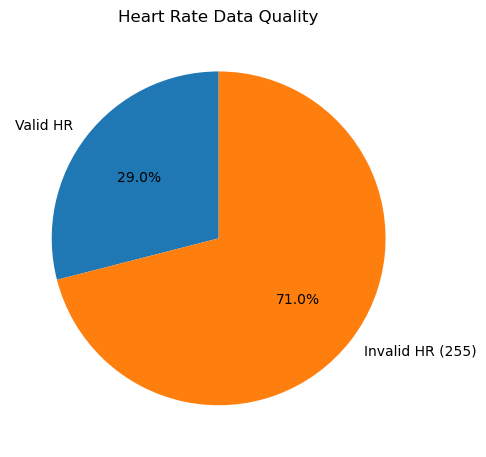

In [10]:
import matplotlib.pyplot as plt

valid_count = (heart_rate["HEART_RATE"] != 255).sum()
invalid_count = (heart_rate["HEART_RATE"] == 255).sum()

labels = ["Valid HR", "Invalid HR (255)"]
sizes = [valid_count, invalid_count]

plt.figure(figsize=(5,5))
plt.pie(
    sizes,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Heart Rate Data Quality")
plt.tight_layout()
plt.show()


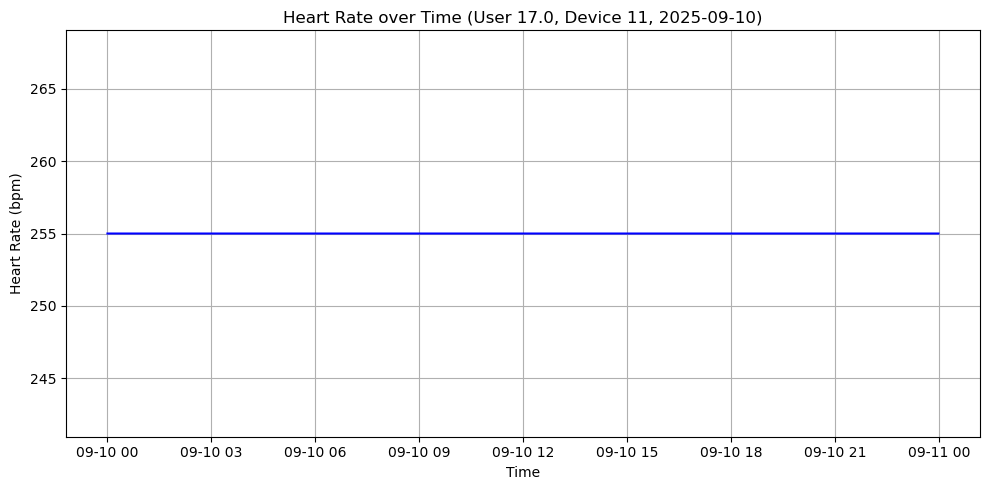

In [11]:
# Pick a sample user/device/date to plot HR time-series
sample_user = heart_rate["USER_ID"].mode().iloc[0]  # most common user
sample_device = heart_rate[heart_rate["USER_ID"] == sample_user]["DEVICE_ID"].mode().iloc[0]  # most common device
sample_date = heart_rate[heart_rate["USER_ID"] == sample_user]["date"].mode().iloc[0]  # most common date

# Filter data for the selected user/device/date
sample_data = heart_rate[(heart_rate["USER_ID"] == sample_user) & 
                       (heart_rate["DEVICE_ID"] == sample_device) & 
                       (heart_rate["date"] == sample_date)]

# Plot HR over time
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(sample_data["datetime"], sample_data["HEART_RATE"], label="Heart Rate", color="b")
plt.title(f"Heart Rate over Time (User {sample_user}, Device {sample_device}, {sample_date})")
plt.xlabel("Time")
plt.ylabel("Heart Rate (bpm)")
plt.grid(True)
plt.tight_layout()
plt.show()


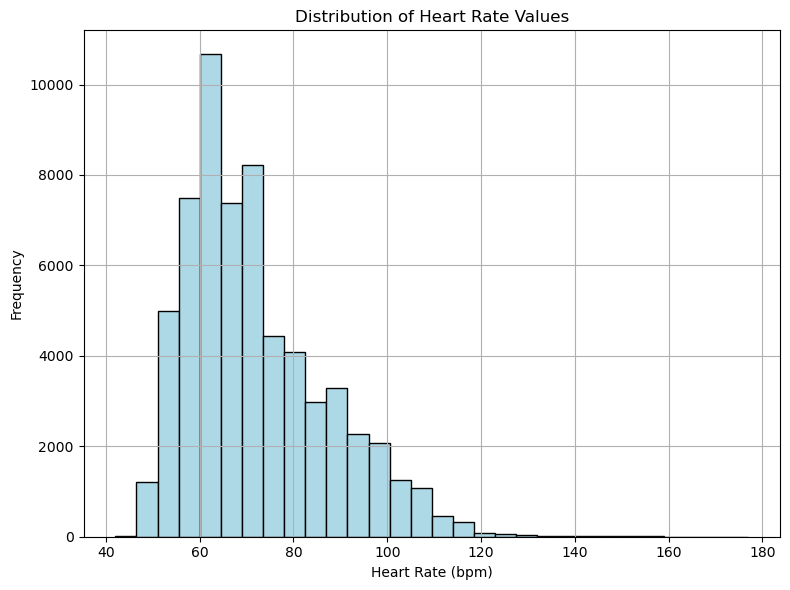

In [12]:
# Plot distribution of HR values (excluding missing/invalid)
valid_hr = heart_rate[heart_rate["HEART_RATE"] != 255]

plt.figure(figsize=(8,6))
plt.hist(valid_hr["HEART_RATE"].dropna(), bins=30, edgecolor="black", color="lightblue")
plt.title("Distribution of Heart Rate Values")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


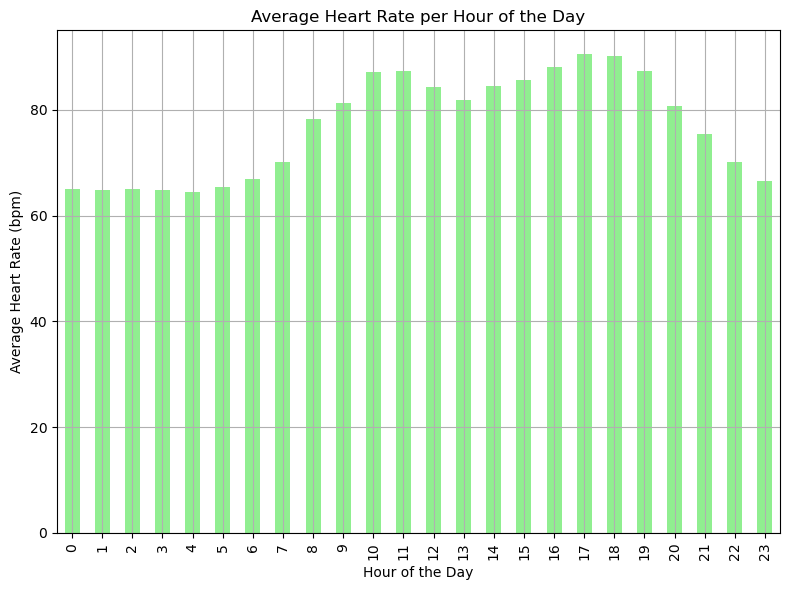

In [13]:
# Group by hour to see the average HR during each hour of the day
hourly_hr = valid_hr.groupby("hour")["HEART_RATE"].mean()

plt.figure(figsize=(8,6))
hourly_hr.plot(kind="bar", color="lightgreen")
plt.title("Average Heart Rate per Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Average Heart Rate (bpm)")
plt.grid(True)
plt.tight_layout()
plt.show()


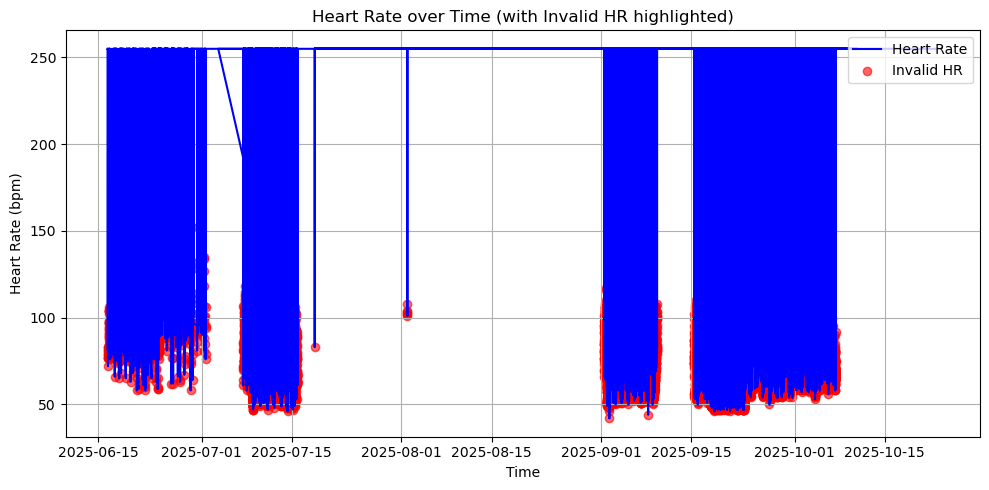

In [14]:
# Flag invalid HR (255) as missing
heart_rate["HR_invalid"] = heart_rate["HEART_RATE"].replace(255, np.nan)

plt.figure(figsize=(10,5))
plt.plot(heart_rate["datetime"], heart_rate["HEART_RATE"], label="Heart Rate", color="blue")
plt.scatter(heart_rate["datetime"][heart_rate["HR_invalid"].isna() == False], 
            heart_rate["HEART_RATE"][heart_rate["HR_invalid"].isna() == False], 
            color="red", label="Invalid HR", alpha=0.6)

plt.title("Heart Rate over Time (with Invalid HR highlighted)")
plt.xlabel("Time")
plt.ylabel("Heart Rate (bpm)")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [15]:
import numpy as np
import pandas as pd

hr = heart_rate.copy()  # use the activity dataset for HR
hr["HEART_RATE"] = hr["HEART_RATE"].replace(255, np.nan)
daily_total = (
    hr.groupby(["USER","DEVICE_ID","date"])
       .size()
       .reset_index(name="total_rows")
)
daily_hr = (
    hr[hr["HEART_RATE"].notna()]
    .groupby(["USER","DEVICE_ID","date"])
    .size()
    .reset_index(name="minutes_with_hr")
)
coverage_simple = daily_total.merge(
    daily_hr,
    on=["USER","DEVICE_ID","date"],
    how="left"
)

coverage_simple["minutes_with_hr"] = coverage_simple["minutes_with_hr"].fillna(0)
coverage_simple["hr_coverage"] = (
    coverage_simple["minutes_with_hr"] / coverage_simple["total_rows"]
)


print(len(coverage_simple))



251


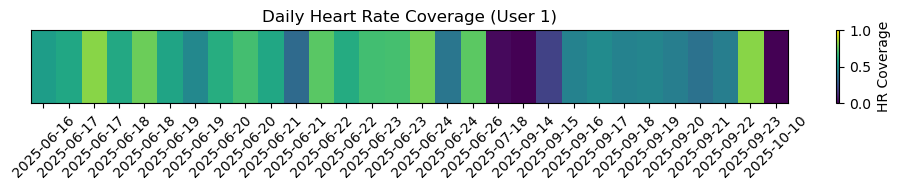

In [114]:
import matplotlib.pyplot as plt
import numpy as np

coverage_u1 = coverage_simple[coverage_simple["USER"] == 1].sort_values("date")

plt.figure(figsize=(10,2))
plt.imshow(
    coverage_u1["hr_coverage"].values.reshape(1, -1),
    aspect="auto",
    cmap="viridis",
    vmin=0,
    vmax=1
)

plt.colorbar(label="HR Coverage")
plt.yticks([])
plt.xticks(
    ticks=np.arange(len(coverage_u1)),
    labels=coverage_u1["date"].astype(str),
    rotation=45
)

plt.title("Daily Heart Rate Coverage (User 1)")
plt.tight_layout()
plt.show()


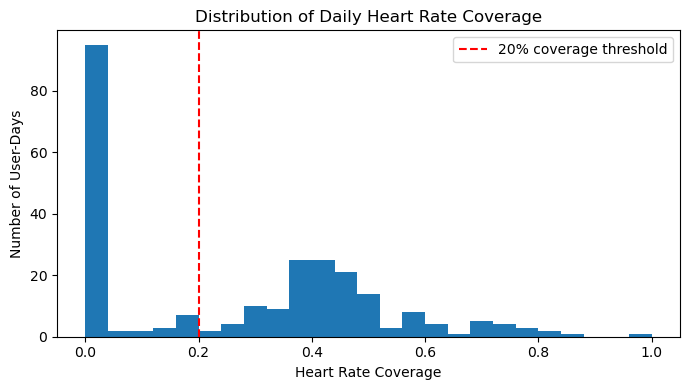

In [122]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(coverage_simple["hr_coverage"], bins=25)
plt.axvline(0.20, color="red", linestyle="--", label="20% coverage threshold")

plt.xlabel("Heart Rate Coverage")
plt.ylabel("Number of User-Days")
plt.title("Distribution of Daily Heart Rate Coverage")
plt.legend()
plt.tight_layout()
plt.show()


In [16]:
coverage_simple[coverage_simple['USER']==1]

,USER,DEVICE_ID,date,total_rows,minutes_with_hr,hr_coverage
0,1,1,2025-06-16,86,48.0,0.558140
1,1,1,2025-06-17,129,77.0,0.596899
2,1,1,2025-06-18,162,98.0,0.604938
3,1,1,2025-06-19,164,96.0,0.585366
4,1,1,2025-06-20,194,121.0,0.623711
5,1,1,2025-06-21,143,85.0,0.594406
6,1,1,2025-06-22,112,69.0,0.616071
7,1,1,2025-06-23,179,125.0,0.698324
8,1,1,2025-06-24,56,44.0,0.785714
9,1,2,2025-06-17,113,93.0,0.823009


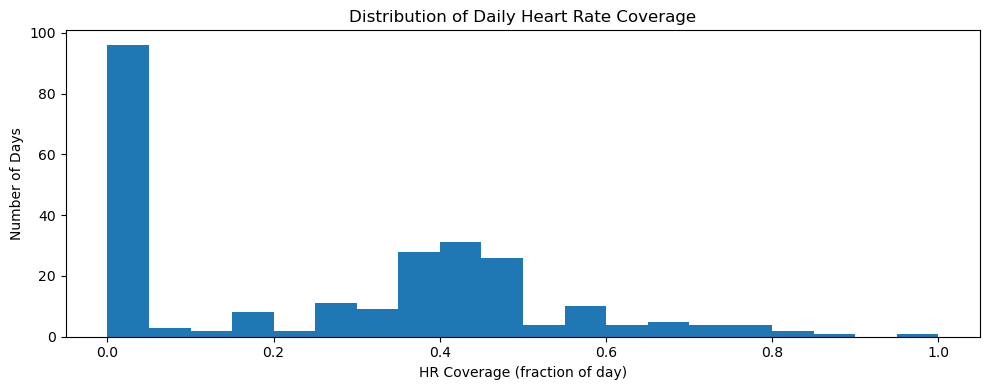

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.hist(coverage_simple["hr_coverage"], bins=20)
plt.title("Distribution of Daily Heart Rate Coverage")
plt.xlabel("HR Coverage (fraction of day)")
plt.ylabel("Number of Days")
plt.tight_layout()
plt.show()


In [18]:
## Usable Days
usable_days = coverage_simple[coverage_simple["hr_coverage"] >= 0.20]
usable_days

,USER,DEVICE_ID,date,total_rows,minutes_with_hr,hr_coverage
0,1,1,2025-06-16,86,48.0,0.558140
1,1,1,2025-06-17,129,77.0,0.596899
2,1,1,2025-06-18,162,98.0,0.604938
3,1,1,2025-06-19,164,96.0,0.585366
4,1,1,2025-06-20,194,121.0,0.623711
...,...,...,...,...,...,...
239,19,23,2025-09-26,1440,491.0,0.340972
240,19,23,2025-09-27,1440,663.0,0.460417
241,19,23,2025-09-28,1440,475.0,0.329861
242,19,23,2025-09-29,1440,425.0,0.295139


In [19]:
## Compare usable vs unusable days
coverage_simple["quality"] = np.where(
    coverage_simple["hr_coverage"] >= 0.20,
    "usable",
    "low_coverage"
)

coverage_simple["quality"].value_counts()


quality
usable          142
low_coverage    109
Name: count, dtype: int64

Selected Pair (similar mean, different distribution):
USER                  12
DEVICE_ID              8
date          2025-07-08
n                    293
hr_mean          76.1843
hr_median           73.0
hr_iqr              41.0
hr_p90_p10          52.8
Name: 82, dtype: object
USER                   5
DEVICE_ID             21
date          2025-10-03
n                    430
hr_mean        76.704651
hr_median           75.0
hr_iqr              4.75
hr_p90_p10          11.0
Name: 85, dtype: object


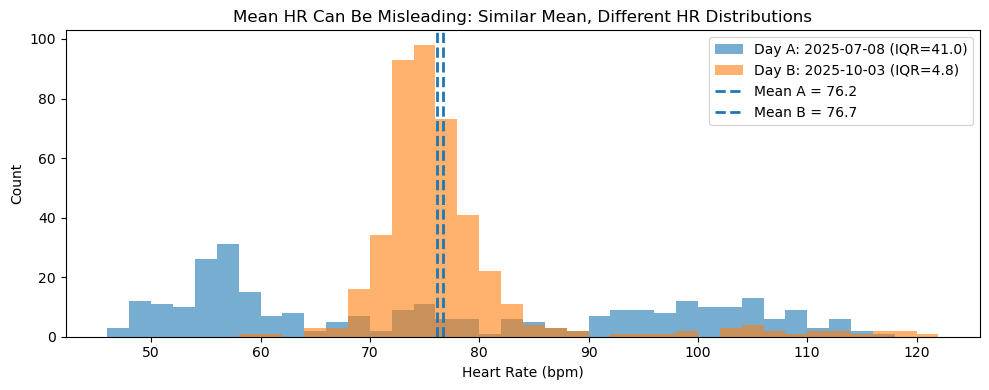

C:\Users\user\AppData\Local\Temp\ipykernel_2528\3137346360.py:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([A, B], labels=[f"A {dayA['date']}", f"B {dayB['date']}"], showfliers=False)


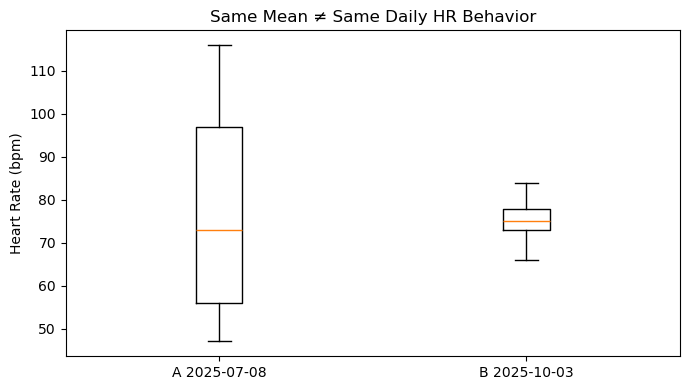

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = heart_rate.copy()

# 1) Clean HR: treat 255 as missing + keep only valid HR
df["HEART_RATE"] = df["HEART_RATE"].replace(255, np.nan)
df = df[df["HEART_RATE"].notna()].copy()

# Optional: physiological bounds (recommended)
df = df[(df["HEART_RATE"] >= 30) & (df["HEART_RATE"] <= 220)].copy()

# 2) Build daily distribution features (NOT just mean)
daily = (
    df.groupby(["USER", "DEVICE_ID", "date"])
      .agg(
          n=("HEART_RATE", "count"),
          hr_mean=("HEART_RATE", "mean"),
          hr_median=("HEART_RATE", "median"),
          hr_p10=("HEART_RATE", lambda x: np.percentile(x, 10)),
          hr_p25=("HEART_RATE", lambda x: np.percentile(x, 25)),
          hr_p75=("HEART_RATE", lambda x: np.percentile(x, 75)),
          hr_p90=("HEART_RATE", lambda x: np.percentile(x, 90)),
      )
      .reset_index()
)

daily["hr_iqr"] = daily["hr_p75"] - daily["hr_p25"]
daily["hr_p90_p10"] = daily["hr_p90"] - daily["hr_p10"]

# Keep only days with enough samples so the shape is meaningful
daily = daily[daily["n"] >= 30].copy()

# 3) Find a pair of days with similar mean but very different variability
#    - similar mean: within 1 bpm
#    - different variability: big difference in IQR or P90-P10
daily = daily.sort_values("hr_mean").reset_index(drop=True)

best = None
best_score = -1

for i in range(len(daily) - 1):
    # search forward a little window for similar means
    for j in range(i + 1, min(i + 200, len(daily))):
        mean_diff = abs(daily.loc[i, "hr_mean"] - daily.loc[j, "hr_mean"])
        if mean_diff > 1.0:
            # because sorted by mean, further j will only increase mean_diff
            break

        # variability difference: use IQR difference (robust)
        var_diff = abs(daily.loc[i, "hr_iqr"] - daily.loc[j, "hr_iqr"])
        # also consider tail difference
        tail_diff = abs(daily.loc[i, "hr_p90_p10"] - daily.loc[j, "hr_p90_p10"])

        score = var_diff + 0.5 * tail_diff  # simple scoring
        if score > best_score:
            best_score = score
            best = (i, j)

if best is None:
    raise ValueError("Couldn't find a good pair. Try lowering n>=30 or mean tolerance.")

i, j = best
dayA = daily.loc[i]
dayB = daily.loc[j]

print("Selected Pair (similar mean, different distribution):")
print(dayA[["USER","DEVICE_ID","date","n","hr_mean","hr_median","hr_iqr","hr_p90_p10"]])
print(dayB[["USER","DEVICE_ID","date","n","hr_mean","hr_median","hr_iqr","hr_p90_p10"]])

# 4) Extract raw HR samples for those two days
A = df[(df["USER"]==dayA["USER"]) & (df["DEVICE_ID"]==dayA["DEVICE_ID"]) & (df["date"]==dayA["date"])]["HEART_RATE"].values
B = df[(df["USER"]==dayB["USER"]) & (df["DEVICE_ID"]==dayB["DEVICE_ID"]) & (df["date"]==dayB["date"])]["HEART_RATE"].values

# 5) Plot: histogram comparison + show SAME mean line
bins = np.arange(min(A.min(), B.min())-1, max(A.max(), B.max())+2, 2)

plt.figure(figsize=(10,4))
plt.hist(A, bins=bins, alpha=0.6, label=f"Day A: {dayA['date']} (IQR={dayA['hr_iqr']:.1f})")
plt.hist(B, bins=bins, alpha=0.6, label=f"Day B: {dayB['date']} (IQR={dayB['hr_iqr']:.1f})")

# draw mean lines
plt.axvline(dayA["hr_mean"], linestyle="--", linewidth=2, label=f"Mean A = {dayA['hr_mean']:.1f}")
plt.axvline(dayB["hr_mean"], linestyle="--", linewidth=2, label=f"Mean B = {dayB['hr_mean']:.1f}")

plt.title("Mean HR Can Be Misleading: Similar Mean, Different HR Distributions")
plt.xlabel("Heart Rate (bpm)")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

# 6) Optional: boxplot (very slide-friendly)
plt.figure(figsize=(7,4))
plt.boxplot([A, B], labels=[f"A {dayA['date']}", f"B {dayB['date']}"], showfliers=False)
plt.title("Same Mean ≠ Same Daily HR Behavior")
plt.ylabel("Heart Rate (bpm)")
plt.tight_layout()
plt.show()


In [20]:
heart_rate = heart_rate.copy()
heart_rate["HEART_RATE"] = heart_rate["HEART_RATE"].replace(255, np.nan)


In [21]:
heart_rate

,TIMESTAMP,DEVICE_ID,USER_ID,RAW_INTENSITY,STEPS,RAW_KIND,HEART_RATE,UNKNOWN1,SLEEP,DEEP_SLEEP,REM_SLEEP,ts_sec,datetime,date,hour,minute,second,USER,HR_invalid
0,1750058520,1,1.0,44,21,80,NaN,13,1,0,0,1750058520,2025-06-16 09:22:00,2025-06-16,9,22,0,1,NaN
1,1750060620,1,1.0,63,48,115,NaN,5,30,0,0,1750060620,2025-06-16 09:57:00,2025-06-16,9,57,0,1,NaN
2,1750063320,1,1.0,110,116,112,NaN,5,2,0,0,1750063320,2025-06-16 10:42:00,2025-06-16,10,42,0,1,NaN
3,1750063380,1,1.0,96,76,112,81.0,29,2,0,0,1750063380,2025-06-16 10:43:00,2025-06-16,10,43,0,1,81.0
4,1750063440,1,1.0,114,97,64,83.0,21,1,0,0,1750063440,2025-06-16 10:44:00,2025-06-16,10,44,0,1,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215432,1761197760,21,5.1,0,0,115,NaN,5,60,0,0,1761197760,2025-10-23 07:36:00,2025-10-23,7,36,0,5,NaN
215433,1761197760,22,18.0,0,0,115,NaN,5,60,0,0,1761197760,2025-10-23 07:36:00,2025-10-23,7,36,0,18,NaN
215434,1761197760,23,19.0,0,0,118,NaN,5,40,0,0,1761197760,2025-10-23 07:36:00,2025-10-23,7,36,0,19,NaN
215435,1761197760,24,9.1,0,0,115,NaN,5,60,0,0,1761197760,2025-10-23 07:36:00,2025-10-23,7,36,0,9,NaN


In [22]:
hr_clean = heart_rate.merge(
    usable_days[["USER","DEVICE_ID","date","hr_coverage"]],
    on=["USER","DEVICE_ID","date"],
    how="inner"
)


In [23]:
hr_clean

,TIMESTAMP,DEVICE_ID,USER_ID,RAW_INTENSITY,STEPS,RAW_KIND,HEART_RATE,UNKNOWN1,SLEEP,DEEP_SLEEP,REM_SLEEP,ts_sec,datetime,date,hour,minute,second,USER,HR_invalid,hr_coverage
0,1750058520,1,1.0,44,21,80,NaN,13,1,0,0,1750058520,2025-06-16 09:22:00,2025-06-16,9,22,0,1,NaN,0.558140
1,1750060620,1,1.0,63,48,115,NaN,5,30,0,0,1750060620,2025-06-16 09:57:00,2025-06-16,9,57,0,1,NaN,0.558140
2,1750063320,1,1.0,110,116,112,NaN,5,2,0,0,1750063320,2025-06-16 10:42:00,2025-06-16,10,42,0,1,NaN,0.558140
3,1750063380,1,1.0,96,76,112,81.0,29,2,0,0,1750063380,2025-06-16 10:43:00,2025-06-16,10,43,0,1,81.0,0.558140
4,1750063440,1,1.0,114,97,64,83.0,21,1,0,0,1750063440,2025-06-16 10:44:00,2025-06-16,10,44,0,1,83.0,0.558140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141912,1759816560,25,2.1,32,0,80,NaN,7,1,0,0,1759816560,2025-10-07 07:56:00,2025-10-07,7,56,0,2,NaN,0.686071
141913,1759816620,25,2.1,65,0,80,NaN,7,1,0,0,1759816620,2025-10-07 07:57:00,2025-10-07,7,57,0,2,NaN,0.686071
141914,1759816680,25,2.1,37,0,80,NaN,7,1,0,0,1759816680,2025-10-07 07:58:00,2025-10-07,7,58,0,2,NaN,0.686071
141915,1759816740,25,2.1,17,0,80,NaN,5,1,0,0,1759816740,2025-10-07 07:59:00,2025-10-07,7,59,0,2,NaN,0.686071


In [24]:
daily_hr_features = (
    hr_clean[hr_clean["HEART_RATE"].notna()]
    .groupby(["USER","DEVICE_ID","date"])
    .agg(
        hr_mean=("HEART_RATE","mean"),
        hr_median=("HEART_RATE","median"),
        hr_min=("HEART_RATE","min"),
        hr_max=("HEART_RATE","max"),
        hr_std=("HEART_RATE","std"),
        hr_samples=("HEART_RATE","count"),
        hr_coverage=("hr_coverage","first")
    )
    .reset_index()
)
daily_hr_features

,USER,DEVICE_ID,date,hr_mean,hr_median,hr_min,hr_max,hr_std,hr_samples,hr_coverage
0,1,1,2025-06-16,89.416667,89.5,72.0,106.0,9.122881,48,0.558140
1,1,1,2025-06-17,91.662338,92.0,66.0,110.0,9.353595,77,0.596899
2,1,1,2025-06-18,91.744898,88.5,65.0,124.0,12.642027,98,0.604938
3,1,1,2025-06-19,87.375000,87.0,63.0,119.0,8.340453,96,0.585366
4,1,1,2025-06-20,86.181818,86.0,58.0,107.0,7.865537,121,0.623711
...,...,...,...,...,...,...,...,...,...,...
137,19,23,2025-09-26,77.114053,70.0,56.0,119.0,13.715299,491,0.340972
138,19,23,2025-09-27,72.631976,66.0,50.0,107.0,13.386888,663,0.460417
139,19,23,2025-09-28,75.974737,71.0,58.0,145.0,12.807212,475,0.329861
140,19,23,2025-09-29,82.943529,77.0,60.0,122.0,13.173967,425,0.295139


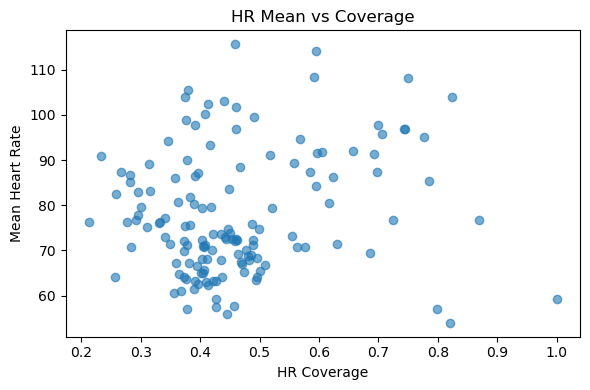

In [25]:
plt.figure(figsize=(6,4))
plt.scatter(daily_hr_features["hr_coverage"], daily_hr_features["hr_mean"], alpha=0.6)
plt.xlabel("HR Coverage")
plt.ylabel("Mean Heart Rate")
plt.title("HR Mean vs Coverage")
plt.tight_layout()
plt.show()


In [26]:
daily_hr = hr_clean.merge(
    daily_hr_features,
    on=["USER","DEVICE_ID","date"],
    how="inner"
)

daily_hr=daily_hr.drop(columns=['HR_invalid','hr_coverage_x'])
daily_hr = daily_hr.rename(columns={'hr_coverage_y':'hr_coverage'})
daily_hr


,TIMESTAMP,DEVICE_ID,USER_ID,RAW_INTENSITY,STEPS,RAW_KIND,HEART_RATE,UNKNOWN1,SLEEP,DEEP_SLEEP,...,minute,second,USER,hr_mean,hr_median,hr_min,hr_max,hr_std,hr_samples,hr_coverage
0,1750058520,1,1.0,44,21,80,NaN,13,1,0,...,22,0,1,89.416667,89.5,72.0,106.0,9.122881,48,0.558140
1,1750060620,1,1.0,63,48,115,NaN,5,30,0,...,57,0,1,89.416667,89.5,72.0,106.0,9.122881,48,0.558140
2,1750063320,1,1.0,110,116,112,NaN,5,2,0,...,42,0,1,89.416667,89.5,72.0,106.0,9.122881,48,0.558140
3,1750063380,1,1.0,96,76,112,81.0,29,2,0,...,43,0,1,89.416667,89.5,72.0,106.0,9.122881,48,0.558140
4,1750063440,1,1.0,114,97,64,83.0,21,1,0,...,44,0,1,89.416667,89.5,72.0,106.0,9.122881,48,0.558140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141912,1759816560,25,2.1,32,0,80,NaN,7,1,0,...,56,0,2,69.493939,69.0,58.0,95.0,4.811488,330,0.686071
141913,1759816620,25,2.1,65,0,80,NaN,7,1,0,...,57,0,2,69.493939,69.0,58.0,95.0,4.811488,330,0.686071
141914,1759816680,25,2.1,37,0,80,NaN,7,1,0,...,58,0,2,69.493939,69.0,58.0,95.0,4.811488,330,0.686071
141915,1759816740,25,2.1,17,0,80,NaN,5,1,0,...,59,0,2,69.493939,69.0,58.0,95.0,4.811488,330,0.686071


In [27]:
daily_hr["hr_range"] = daily_hr["hr_max"] - daily_hr["hr_min"]
daily_hr

,TIMESTAMP,DEVICE_ID,USER_ID,RAW_INTENSITY,STEPS,RAW_KIND,HEART_RATE,UNKNOWN1,SLEEP,DEEP_SLEEP,...,second,USER,hr_mean,hr_median,hr_min,hr_max,hr_std,hr_samples,hr_coverage,hr_range
0,1750058520,1,1.0,44,21,80,NaN,13,1,0,...,0,1,89.416667,89.5,72.0,106.0,9.122881,48,0.558140,34.0
1,1750060620,1,1.0,63,48,115,NaN,5,30,0,...,0,1,89.416667,89.5,72.0,106.0,9.122881,48,0.558140,34.0
2,1750063320,1,1.0,110,116,112,NaN,5,2,0,...,0,1,89.416667,89.5,72.0,106.0,9.122881,48,0.558140,34.0
3,1750063380,1,1.0,96,76,112,81.0,29,2,0,...,0,1,89.416667,89.5,72.0,106.0,9.122881,48,0.558140,34.0
4,1750063440,1,1.0,114,97,64,83.0,21,1,0,...,0,1,89.416667,89.5,72.0,106.0,9.122881,48,0.558140,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141912,1759816560,25,2.1,32,0,80,NaN,7,1,0,...,0,2,69.493939,69.0,58.0,95.0,4.811488,330,0.686071,37.0
141913,1759816620,25,2.1,65,0,80,NaN,7,1,0,...,0,2,69.493939,69.0,58.0,95.0,4.811488,330,0.686071,37.0
141914,1759816680,25,2.1,37,0,80,NaN,7,1,0,...,0,2,69.493939,69.0,58.0,95.0,4.811488,330,0.686071,37.0
141915,1759816740,25,2.1,17,0,80,NaN,5,1,0,...,0,2,69.493939,69.0,58.0,95.0,4.811488,330,0.686071,37.0


In [28]:
hr_variability_across_days = (
    daily_hr.groupby(["USER","DEVICE_ID"])
            .agg(
                mean_of_daily_means=("hr_mean","mean"),
                std_of_daily_means=("hr_mean","std"),
                days_count=("date","count")
            )
            .reset_index()
)
hr_variability_across_days

,USER,DEVICE_ID,mean_of_daily_means,std_of_daily_means,days_count
0,1,1,87.261731,3.252447,1225
1,1,2,96.617367,4.467666,767
2,1,12,60.845128,6.016646,10494
3,2,25,71.829244,2.242532,10561
4,3,9,72.386731,3.882108,11520
5,5,3,102.461261,2.200327,674
6,5,21,80.979890,2.918826,5878
7,9,5,104.572434,11.003904,480
8,9,24,79.933508,4.083402,6980
9,10,7,64.188669,3.787645,10711


In [29]:
hr_variability_across_days["cv_daily_hr"] = (
    hr_variability_across_days["std_of_daily_means"] /
    hr_variability_across_days["mean_of_daily_means"]
)
hr_variability_across_days

,USER,DEVICE_ID,mean_of_daily_means,std_of_daily_means,days_count,cv_daily_hr
0,1,1,87.261731,3.252447,1225,0.037272
1,1,2,96.617367,4.467666,767,0.046241
2,1,12,60.845128,6.016646,10494,0.098885
3,2,25,71.829244,2.242532,10561,0.031220
4,3,9,72.386731,3.882108,11520,0.053630
5,5,3,102.461261,2.200327,674,0.021475
6,5,21,80.979890,2.918826,5878,0.036044
7,9,5,104.572434,11.003904,480,0.105228
8,9,24,79.933508,4.083402,6980,0.051085
9,10,7,64.188669,3.787645,10711,0.059008


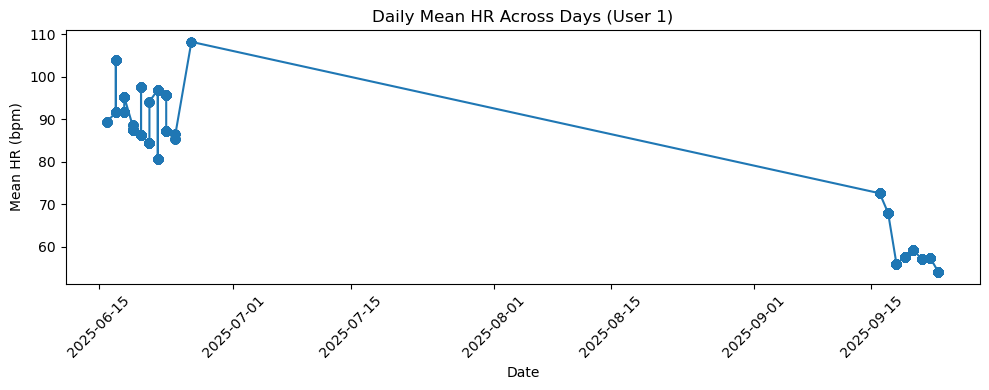

In [30]:
import matplotlib.pyplot as plt

u = daily_hr["USER"].iloc[0]
d = daily_hr[daily_hr["USER"] == u].sort_values("date")

plt.figure(figsize=(10,4))
plt.plot(d["date"], d["hr_mean"], marker="o")
plt.title(f"Daily Mean HR Across Days (User {u})")
plt.xlabel("Date")
plt.ylabel("Mean HR (bpm)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


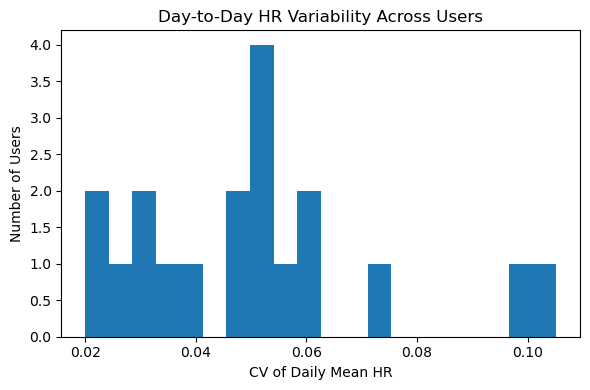

In [31]:
plt.figure(figsize=(6,4))
plt.hist(hr_variability_across_days["cv_daily_hr"].dropna(), bins=20)
plt.xlabel("CV of Daily Mean HR")
plt.ylabel("Number of Users")
plt.title("Day-to-Day HR Variability Across Users")
plt.tight_layout()
plt.show()


In [32]:
hr = heart_rate.copy()

# Clean HR
hr["HEART_RATE"] = hr["HEART_RATE"].replace(255, np.nan)

# Keep only rows with HR
hr = hr[hr["HEART_RATE"].notna()]

hr["activity_state"] = np.where(hr["STEPS"] > 0, "active", "resting")

hr["activity_state"].value_counts()


activity_state
resting    53045
active      9420
Name: count, dtype: int64

In [33]:
daily_rest_active = (
    hr.groupby(["USER","DEVICE_ID","date","activity_state"])
      .agg(
          hr_mean=("HEART_RATE","mean"),
          hr_median=("HEART_RATE","median"),
          hr_std=("HEART_RATE","std"),
          hr_samples=("HEART_RATE","count")
      )
      .reset_index()
)
daily_rest_active

,USER,DEVICE_ID,date,activity_state,hr_mean,hr_median,hr_std,hr_samples
0,1,1,2025-06-16,active,89.416667,89.5,9.122881,48
1,1,1,2025-06-17,active,91.662338,92.0,9.353595,77
2,1,1,2025-06-18,active,91.744898,88.5,12.642027,98
3,1,1,2025-06-19,active,87.375000,87.0,8.340453,96
4,1,1,2025-06-20,active,86.181818,86.0,7.865537,121
...,...,...,...,...,...,...,...,...
287,19,23,2025-10-01,resting,83.476190,80.0,15.933044,21
288,19,23,2025-10-02,resting,96.777778,97.0,3.073181,9
289,19,23,2025-10-04,resting,97.739130,99.0,7.955658,23
290,19,23,2025-10-05,resting,86.000000,86.0,NaN,1


In [34]:
daily_rest_active_wide = daily_rest_active.pivot_table(
    index=["USER","DEVICE_ID","date"],
    columns="activity_state",
    values=["hr_mean","hr_median","hr_std","hr_samples"]
)

daily_rest_active_wide.columns = [
    "_".join(col).strip() for col in daily_rest_active_wide.columns
]

daily_rest_active_wide = daily_rest_active_wide.reset_index()
daily_rest_active_wide


,USER,DEVICE_ID,date,hr_mean_active,hr_mean_resting,hr_median_active,hr_median_resting,hr_samples_active,hr_samples_resting,hr_std_active,hr_std_resting
0,1,1,2025-06-16,89.416667,NaN,89.5,NaN,48.0,NaN,9.122881,NaN
1,1,1,2025-06-17,91.662338,NaN,92.0,NaN,77.0,NaN,9.353595,NaN
2,1,1,2025-06-18,91.744898,NaN,88.5,NaN,98.0,NaN,12.642027,NaN
3,1,1,2025-06-19,87.375000,NaN,87.0,NaN,96.0,NaN,8.340453,NaN
4,1,1,2025-06-20,86.181818,NaN,86.0,NaN,121.0,NaN,7.865537,NaN
...,...,...,...,...,...,...,...,...,...,...,...
167,19,23,2025-10-01,NaN,83.476190,NaN,80.0,NaN,21.0,NaN,15.933044
168,19,23,2025-10-02,NaN,96.777778,NaN,97.0,NaN,9.0,NaN,3.073181
169,19,23,2025-10-04,NaN,97.739130,NaN,99.0,NaN,23.0,NaN,7.955658
170,19,23,2025-10-05,NaN,86.000000,NaN,86.0,NaN,1.0,NaN,NaN


In [35]:
# Corrected Code
filtered_df = daily_rest_active_wide[
    (daily_rest_active_wide['hr_mean_active'].notna()) & 
    (daily_rest_active_wide['hr_mean_resting'].notna())
]
filtered_df

,USER,DEVICE_ID,date,hr_mean_active,hr_mean_resting,hr_median_active,hr_median_resting,hr_samples_active,hr_samples_resting,hr_std_active,hr_std_resting
19,1,12,2025-09-15,79.566667,58.103286,79.5,56.0,60.0,213.0,6.626518,5.554077
20,1,12,2025-09-16,79.939394,72.160066,81.0,73.0,33.0,606.0,14.830162,9.438051
21,1,12,2025-09-17,84.050000,66.966361,88.5,67.0,40.0,654.0,11.017352,10.258023
22,1,12,2025-09-18,77.864407,53.721649,79.0,52.0,59.0,582.0,13.658972,5.146211
23,1,12,2025-09-19,81.390805,54.033275,83.0,52.0,87.0,571.0,11.804962,7.217713
...,...,...,...,...,...,...,...,...,...,...,...
162,19,23,2025-09-26,96.269231,71.966408,96.0,68.0,104.0,387.0,8.712485,9.649366
163,19,23,2025-09-27,97.324324,71.172524,100.0,66.0,37.0,626.0,9.267788,12.109591
164,19,23,2025-09-28,99.145833,73.370023,98.0,70.0,48.0,427.0,11.398002,10.043747
165,19,23,2025-09-29,98.292683,76.692053,99.0,74.0,123.0,302.0,8.883335,8.775222


In [36]:
daily_rest_active_wide["hr_active_minus_rest"] = (
    daily_rest_active_wide["hr_mean_active"] -
    daily_rest_active_wide["hr_mean_resting"]
)
daily_rest_active_wide.head(50)


,USER,DEVICE_ID,date,hr_mean_active,hr_mean_resting,hr_median_active,hr_median_resting,hr_samples_active,hr_samples_resting,hr_std_active,hr_std_resting,hr_active_minus_rest
0,1,1,2025-06-16,89.416667,NaN,89.5,NaN,48.0,NaN,9.122881,NaN,NaN
1,1,1,2025-06-17,91.662338,NaN,92.0,NaN,77.0,NaN,9.353595,NaN,NaN
2,1,1,2025-06-18,91.744898,NaN,88.5,NaN,98.0,NaN,12.642027,NaN,NaN
3,1,1,2025-06-19,87.375000,NaN,87.0,NaN,96.0,NaN,8.340453,NaN,NaN
4,1,1,2025-06-20,86.181818,NaN,86.0,NaN,121.0,NaN,7.865537,NaN,NaN
5,1,1,2025-06-21,84.294118,NaN,84.0,NaN,85.0,NaN,9.419867,NaN,NaN
6,1,1,2025-06-22,80.507246,NaN,81.0,NaN,69.0,NaN,7.615045,NaN,NaN
7,1,1,2025-06-23,87.248000,NaN,88.0,NaN,125.0,NaN,6.570530,NaN,NaN
8,1,1,2025-06-24,85.386364,NaN,85.5,NaN,44.0,NaN,8.926615,NaN,NaN
9,1,2,2025-06-17,103.924731,NaN,106.0,NaN,93.0,NaN,11.068204,NaN,NaN


In [37]:
daily_hr_level = (
    hr.groupby(["USER","DEVICE_ID","date"])
      .agg(
          hr_mean=("HEART_RATE","mean"),
          hr_median=("HEART_RATE","median"),
          hr_min=("HEART_RATE","min"),
          hr_max=("HEART_RATE","max"),
      )
      .reset_index()
)


In [38]:
daily_hr_variability = (
    hr.groupby(["USER","DEVICE_ID","date"])
      .agg(
          hr_std=("HEART_RATE","std"),
          hr_range=("HEART_RATE", lambda x: x.max() - x.min()),
      )
      .reset_index()
)


In [39]:
daily_rest_active = (
    hr.groupby(["USER","DEVICE_ID","date","activity_state"])
      .agg(hr_mean=("HEART_RATE","mean"))
      .reset_index()
)

daily_rest_active = daily_rest_active.pivot_table(
    index=["USER","DEVICE_ID","date"],
    columns="activity_state",
    values="hr_mean"
).reset_index()

daily_rest_active["hr_active_minus_rest"] = (
    daily_rest_active["active"] - daily_rest_active["resting"]
)


In [40]:
daily_rest_active = daily_rest_active.rename(columns={
    "active": "hr_mean_active",
    "resting": "hr_mean_resting"
})


In [41]:
daily_hr_quality = (
    hr.groupby(["USER","DEVICE_ID","date"])
      .agg(
          hr_samples=("HEART_RATE","count"),
      )
      .reset_index()
)

daily_hr_quality = daily_hr_quality.merge(
    coverage_simple[["USER","DEVICE_ID","date","hr_coverage"]],
    on=["USER","DEVICE_ID","date"],
    how="left"
)


In [42]:
daily_hr_features = (
    daily_hr_level
    .merge(daily_hr_variability, on=["USER","DEVICE_ID","date"], how="left")
    .merge(daily_rest_active, on=["USER","DEVICE_ID","date"], how="left")
    .merge(daily_hr_quality, on=["USER","DEVICE_ID","date"], how="left")
)


In [43]:
daily_hr_features.head(50)


,USER,DEVICE_ID,date,hr_mean,hr_median,hr_min,hr_max,hr_std,hr_range,hr_mean_active,hr_mean_resting,hr_active_minus_rest,hr_samples,hr_coverage
0,1,1,2025-06-16,89.416667,89.5,72.0,106.0,9.122881,34.0,89.416667,NaN,NaN,48,0.558140
1,1,1,2025-06-17,91.662338,92.0,66.0,110.0,9.353595,44.0,91.662338,NaN,NaN,77,0.596899
2,1,1,2025-06-18,91.744898,88.5,65.0,124.0,12.642027,59.0,91.744898,NaN,NaN,98,0.604938
3,1,1,2025-06-19,87.375000,87.0,63.0,119.0,8.340453,56.0,87.375000,NaN,NaN,96,0.585366
4,1,1,2025-06-20,86.181818,86.0,58.0,107.0,7.865537,49.0,86.181818,NaN,NaN,121,0.623711
5,1,1,2025-06-21,84.294118,84.0,59.0,127.0,9.419867,68.0,84.294118,NaN,NaN,85,0.594406
6,1,1,2025-06-22,80.507246,81.0,60.0,97.0,7.615045,37.0,80.507246,NaN,NaN,69,0.616071
7,1,1,2025-06-23,87.248000,88.0,63.0,105.0,6.570530,42.0,87.248000,NaN,NaN,125,0.698324
8,1,1,2025-06-24,85.386364,85.5,59.0,113.0,8.926615,54.0,85.386364,NaN,NaN,44,0.785714
9,1,2,2025-06-17,103.924731,106.0,78.0,122.0,11.068204,44.0,103.924731,NaN,NaN,93,0.823009


In [44]:
import numpy as np
import pandas as pd

hr = heart_rate.copy()

# Clean HR
hr["HEART_RATE"] = hr["HEART_RATE"].replace(255, np.nan)
hr.loc[(hr["HEART_RATE"] < 30) | (hr["HEART_RATE"] > 220), "HEART_RATE"] = np.nan

# Keep valid HR only
hr = hr[hr["HEART_RATE"].notna()].copy()


In [136]:
daily_hr_percentiles = (
    hr.groupby(["USER","DEVICE_ID","date"])
      .agg(
          hr_p10=("HEART_RATE", lambda x: np.percentile(x, 10)),
          hr_p25=("HEART_RATE", lambda x: np.percentile(x, 25)),
          hr_median=("HEART_RATE", np.median),
          hr_mean = ("HEART_RATE",np.mean),
          hr_p75=("HEART_RATE", lambda x: np.percentile(x, 75)),
          hr_p90=("HEART_RATE", lambda x: np.percentile(x, 90)),
      )
      .reset_index()
)

daily_hr_percentiles["hr_iqr"] = (
    daily_hr_percentiles["hr_p75"] -
    daily_hr_percentiles["hr_p25"]
)

daily_hr_percentiles.head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_2528\3828663155.py:3: FutureWarning: The provided callable <function median at 0x000001DE75A3E340> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  .agg(
C:\Users\user\AppData\Local\Temp\ipykernel_2528\3828663155.py:3: FutureWarning: The provided callable <function mean at 0x000001DE758FB6A0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  .agg(


,USER,DEVICE_ID,date,hr_p10,hr_p25,hr_median,hr_mean,hr_p75,hr_p90,hr_iqr
0,1,1,2025-06-16,77.0,81.75,89.5,89.416667,97.00,104.0,15.25
1,1,1,2025-06-17,80.6,83.00,92.0,91.662338,97.00,105.0,14.00
2,1,1,2025-06-18,79.0,83.00,88.5,91.744898,100.00,112.6,17.00
3,1,1,2025-06-19,78.0,83.00,87.0,87.375000,90.25,97.0,7.25
4,1,1,2025-06-20,76.0,82.00,86.0,86.181818,91.00,96.0,9.00
5,1,1,2025-06-21,75.4,80.00,84.0,84.294118,89.00,94.0,9.00
6,1,1,2025-06-22,70.4,76.00,81.0,80.507246,87.00,89.0,11.00
7,1,1,2025-06-23,80.0,84.00,88.0,87.248000,92.00,94.0,8.00
8,1,1,2025-06-24,79.3,81.75,85.5,85.386364,90.00,92.7,8.25
9,1,2,2025-06-17,88.0,96.00,106.0,103.924731,112.00,117.0,16.00


In [46]:
baseline_hr = (
    hr.groupby("USER")["HEART_RATE"]
      .median()
      .rename("user_hr_baseline")
      .reset_index()
)

hr = hr.merge(baseline_hr, on="USER", how="left")


In [47]:
hr["above_baseline"] = hr["HEART_RATE"] > (hr["user_hr_baseline"] + 10)


In [48]:
daily_time_above = (
    hr.groupby(["USER","DEVICE_ID","date"])
      .agg(
          minutes_above_baseline=("above_baseline", "sum"),
          total_hr_samples=("HEART_RATE", "count")
      )
      .reset_index()
)

daily_time_above["pct_time_above_baseline"] = (
    daily_time_above["minutes_above_baseline"] /
    daily_time_above["total_hr_samples"]
)


In [49]:
hr["hr_spike"] = hr["HEART_RATE"] > (hr["user_hr_baseline"] + 25)


In [50]:
daily_spikes = (
    hr.groupby(["USER","DEVICE_ID","date"])
      .agg(
          hr_spike_count=("hr_spike", "sum"),
      )
      .reset_index()
)


In [51]:
daily_spikes["spikes_per_100_samples"] = (
    daily_spikes["hr_spike_count"] /
    daily_time_above["total_hr_samples"] * 100
)


In [52]:
daily_hr_robust = (
    daily_hr_percentiles
    .merge(daily_time_above, on=["USER","DEVICE_ID","date"], how="left")
    .merge(daily_spikes, on=["USER","DEVICE_ID","date"], how="left")
)


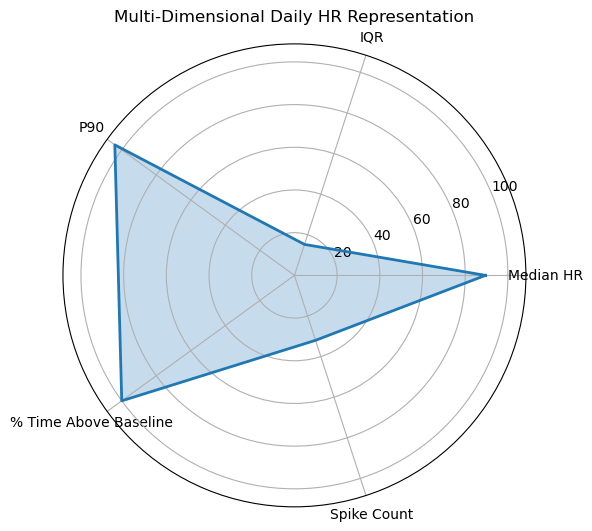

In [134]:
import numpy as np

labels = [
    "Median HR",
    "IQR",
    "P90",
    "% Time Above Baseline",
    "Spike Count"
]

values = [
    example["hr_median"],
    example["hr_iqr"],
    example["hr_p90"],
    example["pct_time_above_baseline"] * 100,  # scale %
    example["hr_spike_count"]
]

angles = np.linspace(0, 2*np.pi, len(labels), endpoint=False)
values += values[:1]
angles = np.concatenate([angles, [angles[0]]])

plt.figure(figsize=(6,6))
ax = plt.subplot(111, polar=True)
ax.plot(angles, values, linewidth=2)
ax.fill(angles, values, alpha=0.25)

ax.set_thetagrids(angles[:-1]*180/np.pi, labels)
ax.set_title("Multi-Dimensional Daily HR Representation")
plt.tight_layout()
plt.show()


In [53]:
daily_hr_robust

,USER,DEVICE_ID,date,hr_p10,hr_p25,hr_median,hr_p75,hr_p90,hr_iqr,minutes_above_baseline,total_hr_samples,pct_time_above_baseline,hr_spike_count,spikes_per_100_samples
0,1,1,2025-06-16,77.0,81.75,89.5,97.00,104.0,15.25,48,48,1.000000,32,66.666667
1,1,1,2025-06-17,80.6,83.00,92.0,97.00,105.0,14.00,76,77,0.987013,54,70.129870
2,1,1,2025-06-18,79.0,83.00,88.5,100.00,112.6,17.00,97,98,0.989796,59,60.204082
3,1,1,2025-06-19,78.0,83.00,87.0,90.25,97.0,7.25,94,96,0.979167,61,63.541667
4,1,1,2025-06-20,76.0,82.00,86.0,91.00,96.0,9.00,117,121,0.966942,65,53.719008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,19,23,2025-10-01,63.0,71.00,80.0,99.00,102.0,28.00,10,21,0.476190,8,38.095238
168,19,23,2025-10-02,93.0,95.00,97.0,98.00,99.0,3.00,9,9,1.000000,5,55.555556
169,19,23,2025-10-04,93.2,95.50,99.0,100.50,102.0,5.00,22,23,0.956522,16,69.565217
170,19,23,2025-10-05,86.0,86.00,86.0,86.00,86.0,0.00,1,1,1.000000,0,0.000000


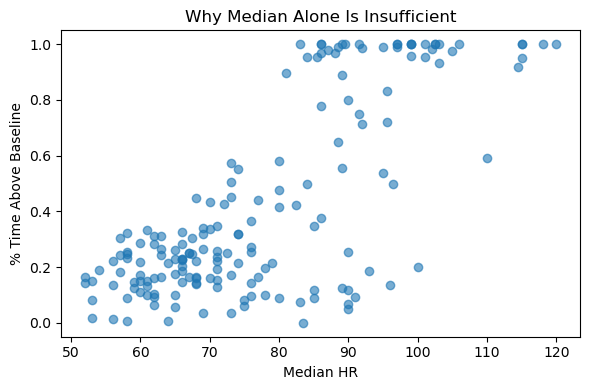

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(
    daily_hr_robust["hr_median"],
    daily_hr_robust["pct_time_above_baseline"],
    alpha=0.6
)
plt.xlabel("Median HR")
plt.ylabel("% Time Above Baseline")
plt.title("Why Median Alone Is Insufficient")
plt.tight_layout()
plt.show()


In [138]:
from sklearn.preprocessing import StandardScaler

features = [
    "hr_median",
    "hr_iqr",
    "hr_p90",
    "pct_time_above_baseline",
    "hr_spike_count"
]

X = daily_hr_robust[features].dropna().copy()


In [140]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


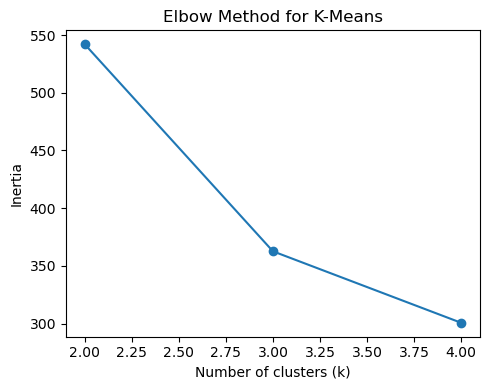

In [146]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_range = range(2, 5)

for k in k_range:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure(figsize=(5,4))
plt.plot(k_range, inertia, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for K-Means")
plt.tight_layout()
plt.show()


In [148]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

daily_hr_robust_ml = daily_hr_robust.loc[X.index].copy()
daily_hr_robust_ml["cluster"] = clusters


C:\Users\user\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [150]:
cluster_summary = (
    daily_hr_robust_ml
    .groupby("cluster")[features]
    .mean()
)

cluster_summary


,hr_median,hr_iqr,hr_p90,pct_time_above_baseline,hr_spike_count
cluster,,,,,
0,68.227273,22.212121,99.509091,0.335425,97.878788
1,68.688235,9.911765,85.200000,0.170270,25.105882
2,96.231481,10.634259,106.777778,0.847432,24.574074


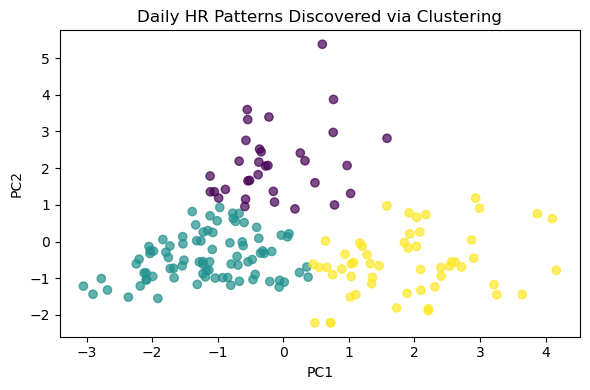

In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,4))
plt.scatter(
    X_pca[:,0],
    X_pca[:,1],
    c=clusters,
    alpha=0.7
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Daily HR Patterns Discovered via Clustering")
plt.tight_layout()
plt.show()
